<a href="https://colab.research.google.com/github/alex-anhvuong/data-analysis-python/blob/main/ASX_Z1P_visualisations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.3MB 6.4MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=ba61558b632a4ccdb526f01631de5156e3a32bcffe32bdb44e6aef10c4bb3dc2
  Stored in directory: /root/.cache/pip/wheels/fe/a0/79/b73d4a0c535b421b88fc7b393936b371fabbfeaf979eca4050
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


**Fetching data objects:**

In [14]:
import yfinance as yf

z1p = yf.Ticker("Z1P.AX")

# get stock info
print(z1p.info)

# get historical market data of Zip within 2 years time
hist = z1p.history(period="2y")
display(hist)

{'zip': '2000', 'sector': 'Financial Services', 'fullTimeEmployees': 612, 'longBusinessSummary': 'Zip Co Limited provides point-of-sale credit and digital payment services to consumers and merchants in Australia, the United Kingdom, the United States, New Zealand, and South Africa. The company operates through ZIP AU, Zip Global, and Spotcap segments. It offers integrated retail finance solutions to merchants in the retail, education, health, and travel industries through online and in store. The company provides Zip Pay and Zip Money, which are digital wallets; and Pocketbook, a personal finance application to help people manage their finances, budget, and savings, as well as unsecured loans to small and medium sized businesses. In addition, it offers a Buy Now Pay Later services whereby consumers split repayments into equal instalments. The company was formerly known as ZipMoney Limited and changed its name to Zip Co Limited in December 2017. Zip Co Limited was incorporated in 2009 a

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-07-19,3.16,3.16,3.060,3.08,1346017,0,0
2019-07-22,3.10,3.10,3.010,3.05,1176397,0,0
2019-07-23,3.05,3.18,3.050,3.18,1853682,0,0
2019-07-24,3.21,3.54,3.210,3.47,5453327,0,0
2019-07-25,3.51,3.54,3.300,3.31,2360822,0,0
...,...,...,...,...,...,...,...
2021-07-13,8.22,8.44,8.100,8.26,5859045,0,0
2021-07-14,7.74,7.78,7.320,7.32,25678105,0,0
2021-07-15,7.26,7.36,6.905,6.91,19482226,0,0


**Visualising:**

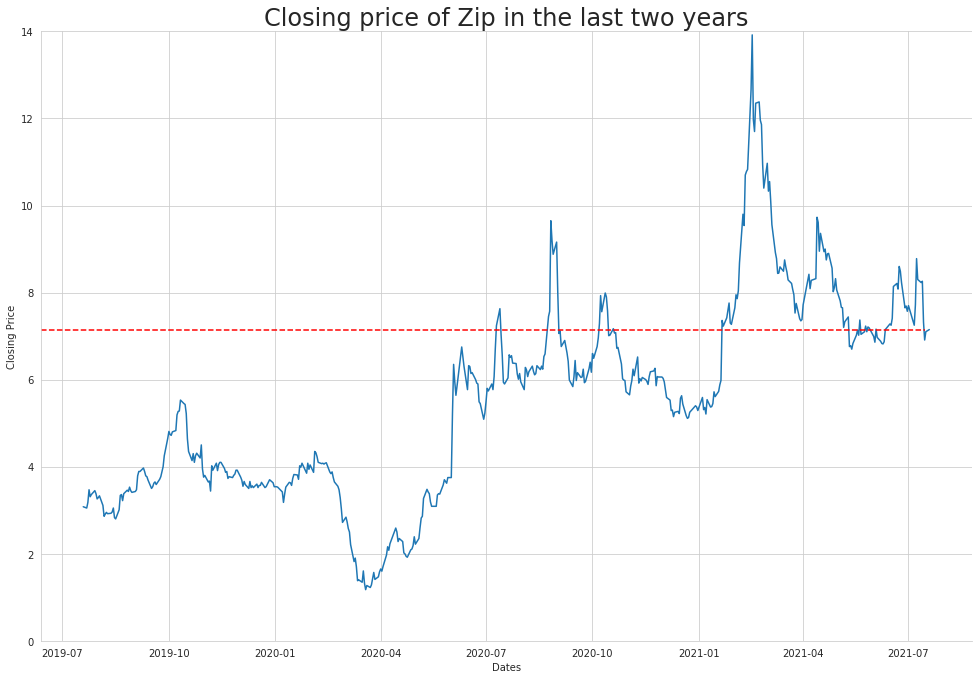

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plot = sns.relplot(
    data=hist,
    kind="line",
    y="Close",
    x=hist.index,
    height=9, aspect=1.5,
).set_axis_labels(
    'Dates', 'Closing Price'
).set(
    ylim=(0,14),
)

plt.axhline(hist.Close[-1], xmax=0.95, color="red", linestyle ="--",)
plt.title("Closing price of Zip in the last two years", fontsize=24)
plt.show()

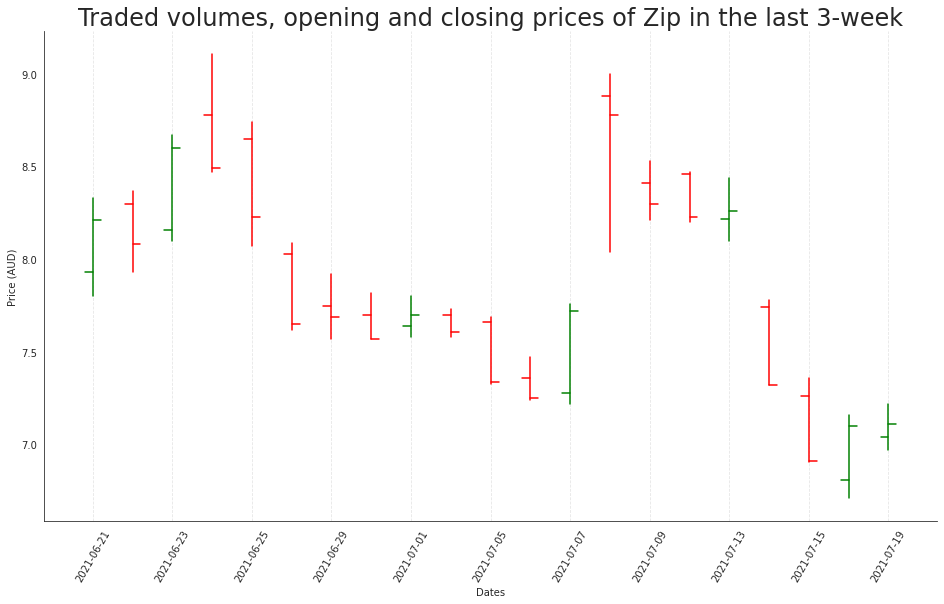

In [65]:
import numpy as np

sns.set_style("white")
df_hist = z1p.history(period="21d")

x = np.arange(0, len(df_hist))
fig, ax = plt.subplots(1, figsize=(16,9))

new_hist = df_hist.reset_index()

for idx, val in new_hist.iterrows():
    color = 'green'
    if (val['Open'] > val['Close']): color='red'

    # range of price
    plt.plot([x[idx], x[idx]], 
             [val['Low'], val['High']],
             color=color)
    
    # open marker
    plt.plot([x[idx], x[idx]-0.2], 
             [val['Open'], val['Open']], 
             color=color)

    # close marker
    plt.plot([x[idx], x[idx]+0.2],
             [val['Close'], val['Close']],
             color=color)
plt.xticks(x[::2], new_hist['Date'].dt.date[::2], rotation = 60)
plt.xlabel("Dates")

ax.xaxis.grid(color='black', linestyle='dashed', which='both', alpha=0.1)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.ylabel("Price (AUD)")
plt.title("Traded volumes, opening and closing prices of Zip in the last 3-week", fontsize=24)
plt.show()